In [168]:
#Carga de las librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score , precision_score , classification_report,confusion_matrix, recall_score, f1_score
from sklearn import tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [44]:
#Ahora si cargamos los datos en jupyter!
data= pd.read_csv("BankMarketing.csv",sep =';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [45]:
#Analicemos brevemente el dataset
data.shape

(41188, 21)

In [46]:
data.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [48]:
# Check valores nulos
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [49]:
# Check for duplicate rows and delete
data.duplicated().sum()

12

In [50]:
data = data.drop_duplicates()

In [51]:
data.duplicated().sum()

0

In [52]:
data['y'].value_counts() #variable target

no     36537
yes     4639
Name: y, dtype: int64

In [53]:
data.loc[(data['y'] == 'no'), 'y'] = 0 # Transformar a dato numérico
data.loc[(data['y'] == 'yes'), 'y'] = 1
data['y'] = data['y'].astype(int)

In [54]:
no_suscrip = data[data['y'] == 0]
suscrip = data[data['y'] == 1]

print ("Suscribe: %i (%.1f%%)"%(len(suscrip), float(len(suscrip))/len(data)*100.0))
print ("No suscribe: %i (%.1f%%)"%(len(no_suscrip), float(len(no_suscrip))/len(data)*100.0))
print ("Total: %i"%len(data))


Suscribe: 4639 (11.3%)
No suscribe: 36537 (88.7%)
Total: 41176


In [55]:
data.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
age,41176.000000,40.023800,10.420680,17.000000,32.000000,38.000000,47.000000,98.000000
duration,41176.000000,258.315815,259.305321,0.000000,102.000000,180.000000,319.000000,4918.000000
campaign,41176.000000,2.567879,2.770318,1.000000,1.000000,2.000000,3.000000,56.000000
pdays,41176.000000,962.464810,186.937102,0.000000,999.000000,999.000000,999.000000,999.000000
previous,41176.000000,0.173013,0.494964,0.000000,0.000000,0.000000,0.000000,7.000000
emp.var.rate,41176.000000,0.081922,1.570883,-3.400000,-1.800000,1.100000,1.400000,1.400000
cons.price.idx,41176.000000,93.575720,0.578839,92.201000,93.075000,93.749000,93.994000,94.767000
cons.conf.idx,41176.000000,-40.502863,4.627860,-50.800000,-42.700000,-41.800000,-36.400000,-26.900000
euribor3m,41176.000000,3.621293,1.734437,0.634000,1.344000,4.857000,4.961000,5.045000
nr.employed,41176.000000,5167.034870,72.251364,4963.600000,5099.100000,5191.000000,5228.100000,5228.100000


In [56]:
#Valores unicos de cada columna
for i in list(data.columns):
    
    # get a list of unique values
    
    n = data[i].unique()
    print(i)
    print(n)
    print('\n')
   

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


marital
['married' 'single' 'divorced' 'unknown']


education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


default
['no' 'unknown' 'yes']


housing
['no' 'yes' 'unknown']


loan
['no' 'yes' 'unknown']


contact
['telephone' 'cellular']


month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']


duration
[ 261  149  226 ... 1246 1556 1868]


campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 4

**Análisis de Variables Categóricas**

In [87]:
#Separo variables numéricas y categóricas
cols_num = [x for x in data.columns if data[x].dtype != 'object' and data[x].dtype != 'bool']
cols_cat = [x for x in data.columns if x not in numerical_columns]
cols_cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [58]:
data['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [60]:
d1=data[['job', 'y']].groupby(['job'], as_index=False).mean().sort_values(by='y', ascending=False)
d1 # relación entre con la variable target

,job,y
8,student,0.314286
5,retired,0.252619
10,unemployed,0.142012
0,admin.,0.129667
4,management,0.112175
11,unknown,0.112121
9,technician,0.108325
6,self-employed,0.104856
3,housemaid,0.100000
2,entrepreneur,0.085165


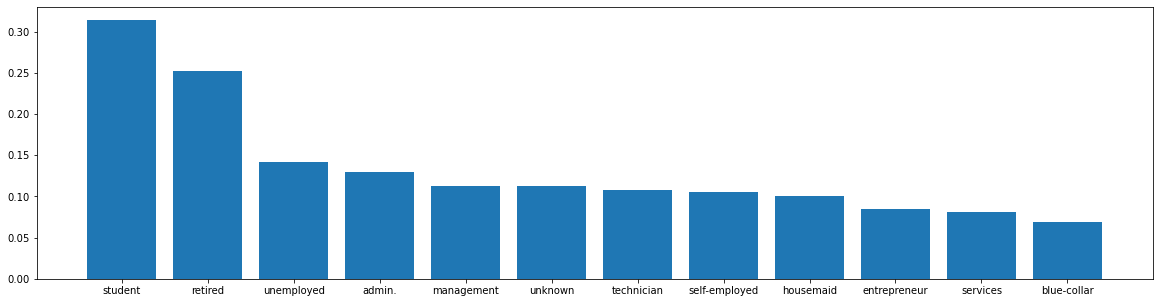

In [61]:
plt.figure(figsize=(20, 5))
plt.bar(d1['job'], d1['y'])
plt.show()

In [62]:
data['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [63]:
data[['marital', 'y']].groupby(['marital'], as_index=False).mean().sort_values(by='y', ascending=False)

,marital,y
3,unknown,0.150000
2,single,0.140090
0,divorced,0.103231
1,married,0.101561


In [64]:
data['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [65]:
data[['education', 'y']].groupby(['education'], as_index=False).mean().sort_values(by='y', ascending=False)

,education,y
4,illiterate,0.222222
7,unknown,0.145087
6,university.degree,0.137208
5,professional.course,0.113550
3,high.school,0.108389
0,basic.4y,0.102490
1,basic.6y,0.082060
2,basic.9y,0.078246


In [66]:
data['default'].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [67]:
data[['default', 'y']].groupby(['default'], as_index=False).mean().sort_values(by='y', ascending=False)

,default,y
0,no,0.128803
1,unknown,0.051536
2,yes,0.000000


In [68]:
data['housing'].value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

In [69]:
data[['housing', 'y']].groupby(['housing'], as_index=False).mean().sort_values(by='y', ascending=False)

,housing,y
2,yes,0.116221
0,no,0.108783
1,unknown,0.108081


In [70]:
data['loan'].value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

In [71]:
data[['loan', 'y']].groupby(['loan'], as_index=False).mean().sort_values(by='y', ascending=False)

,loan,y
0,no,0.113413
2,yes,0.109315
1,unknown,0.108081


In [72]:
data['contact'].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

In [73]:
data[['contact', 'y']].groupby(['contact'], as_index=False).mean().sort_values(by='y', ascending=False)

,contact,y
0,cellular,0.147389
1,telephone,0.052324


**Meses Vs Y -  Marzo, Diciembre, Septiembre y Octubre  con mayor % de Suscripciones**

In [74]:
data['month'].value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [75]:
d1 = data[['month', 'y']].groupby(['month'], as_index=False).mean().sort_values(by='y', ascending=False)
d1

,month,y
5,mar,0.505495
2,dec,0.489011
9,sep,0.449123
8,oct,0.439331
0,apr,0.204865
1,aug,0.106056
4,jun,0.105115
7,nov,0.101463
3,jul,0.090389
6,may,0.064357


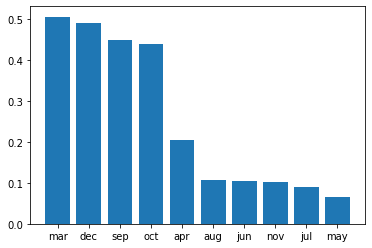

In [76]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(d1['month'], d1['y'])
plt.show()

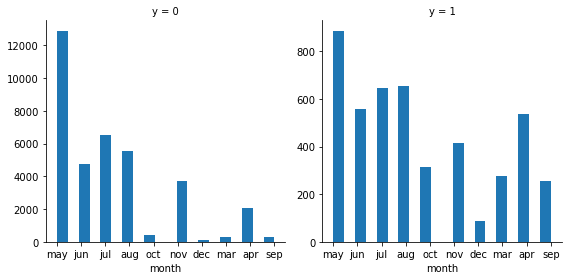

In [77]:
g = sns.FacetGrid(data, col='y', height=4, sharey= False)
g.map(plt.hist, 'month', bins=20)

In [78]:
data['day_of_week'].value_counts()

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

In [79]:
data[['day_of_week', 'y']].groupby(['day_of_week'], as_index=False).mean().sort_values(by='y', ascending=False)

,day_of_week,y
2,thu,0.121142
3,tue,0.117858
4,wed,0.116671
0,fri,0.108101
1,mon,0.099507


**Poutcome Vs Y - Mayor % de suscriptos**



In [80]:
data['poutcome'].value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [82]:
d1 = data[['poutcome', 'y']].groupby(['poutcome'], as_index=False).mean().sort_values(by='y', ascending=False)
d1

,poutcome,y
2,success,0.651129
0,failure,0.142286
1,nonexistent,0.088324


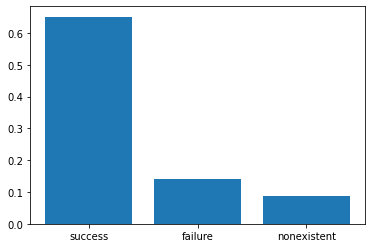

In [83]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(d1['poutcome'], d1['y'])
plt.show()

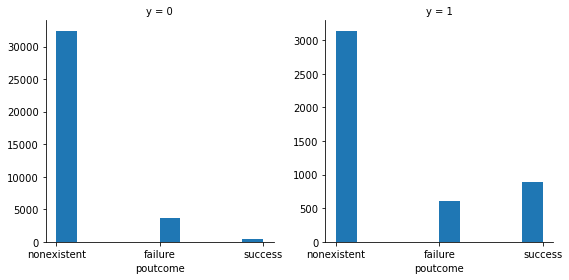

In [84]:
g = sns.FacetGrid(data, col='y', height=4, sharey=False)
g.map(plt.hist, 'poutcome', bins=10)

**FUNCIÓN PARA DETECTAR VALORES ATíPICOS**

In [85]:
#Me fijo qué columnas tienen como valores 'unknown'
def where_words (df, word):
  df_where = []
  for column in df.columns:
    if word in list(df[column].unique()):
      df_where.append(str(column))
  return df_where
#Cuento la cantidad de 'unknown' que hay en la columna
def count_words(df, word):
  df_how_many = []
  for column in where_words(df, word):
    how_many = len(df[df[column] == word])
    df_how_many.append(how_many)
  return df_how_many
#Calculo el porcentage de unknowns que tiene la columna
def percentage_words(df, word):
  df_percentage = []
  for values in count_words(df, word):
    df_percentage.append(values/len(df[df.columns[0]])*100)
  return where_words(df,word), count_words(df,word), df_percentage
#Paso a 
def word_table (df, word):
  words = pd.DataFrame(percentage_words(df,word)).T
  words.columns = ['column','quantity_of_words','percentage']
  words.sort_values(['percentage'], axis=0, ascending=False).reset_index(drop=True)
  return words


In [86]:
words = ['unknown',999]

for word in words:
    print (word)
    print (word_table(data, word))


unknown
      column quantity_of_words percentage
0        job               330   0.801438
1    marital                80   0.194288
2  education              1730   4.201477
3    default              8596  20.876239
4    housing               990   2.404313
5       loan               990   2.404313
999
     column quantity_of_words percentage
0  duration                 2   0.004857
1     pdays             39661  96.320672


**Análisis de Variables Numéricas**

In [88]:
cols_num 

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

**Age**

In [89]:
data['age'].describe()

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

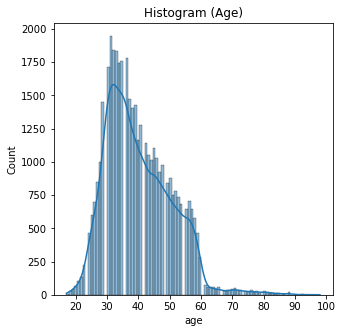

In [90]:
plt.figure(figsize = (5,5))
sns.histplot(x = "age", data = data, kde =True)
plt.title("Histogram (Age)")
plt.show()

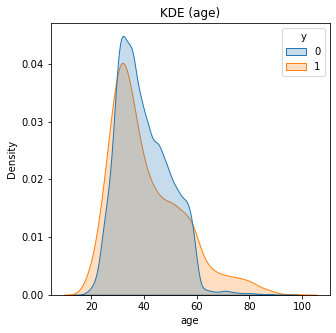

In [91]:
plt.figure(figsize = (5,5))
sns.kdeplot(x = "age", data = data,hue = 'y', fill = True, common_norm = False)
plt.title("KDE (age)")
plt.show()

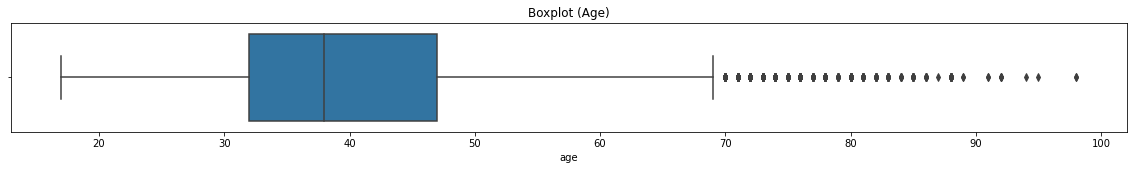

In [92]:
plt.figure(figsize = (20,2))
sns.boxplot(x = "age", data = data)
plt.title("Boxplot (Age)")
plt.show()

**Duration**

In [93]:
data['duration'].describe()

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

#### DURATION para reducir los valores de segundos a minutos se divide en 60. Se visualiza que los valores atípicos son los que mayormente se suscribieron a la campaña

In [94]:
data.loc[:,"duration"] = data[['duration']].div(60)

In [95]:
data["duration"]

0        4.350000
1        2.483333
2        3.766667
3        2.516667
4        5.116667
           ...   
41183    5.566667
41184    6.383333
41185    3.150000
41186    7.366667
41187    3.983333
Name: duration, Length: 41176, dtype: float64

In [96]:
data['duration'].describe()

count    41176.000000
mean         4.305264
std          4.321755
min          0.000000
25%          1.700000
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

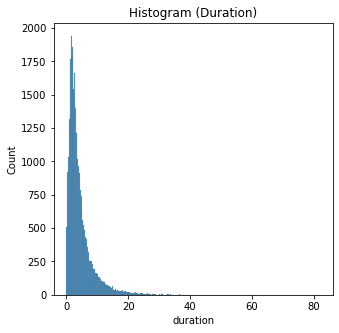

In [98]:
plt.figure(figsize = (5,5))
sns.histplot(x = "duration", data = data)
plt.title("Histogram (Duration)")
plt.show()


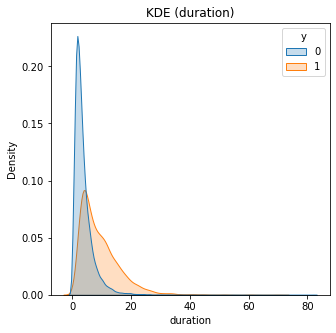

In [99]:
plt.figure(figsize = (5,5))
sns.kdeplot(x = "duration", data = data,hue = 'y', fill = True, common_norm = False)
plt.title("KDE (duration)")
plt.show()

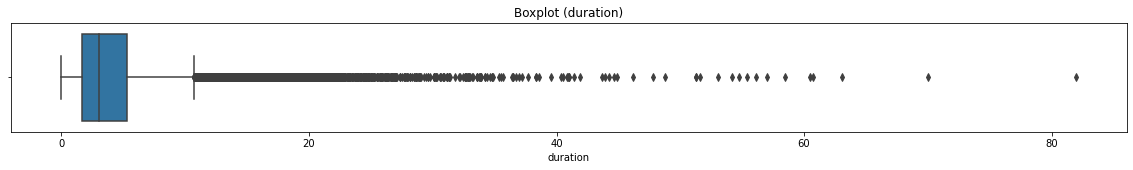

In [100]:
plt.figure(figsize = (20,2))
sns.boxplot(x = "duration", data = data)
plt.title("Boxplot (duration)")
plt.show()

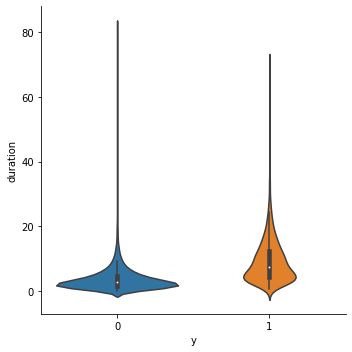

In [101]:
sns.catplot(x = 'y', y ='duration', data = data, kind = "violin", bw = 0.25);

**Campaign** - Número de contactos para el ofrecimiento de la actual campaña. 

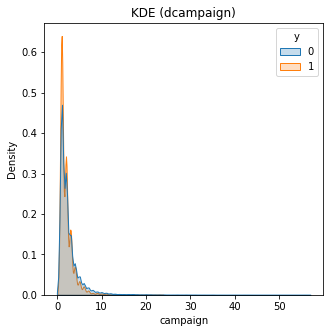

In [105]:
plt.figure(figsize = (5,5))
sns.kdeplot(x = "campaign", data = data,hue = 'y', fill = True, common_norm = False)
plt.title("KDE (dcampaign)")
plt.show()

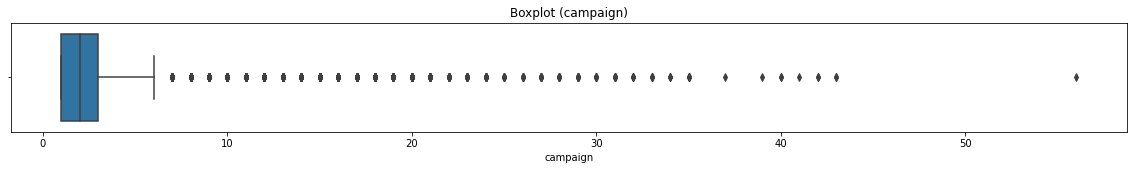

In [106]:
plt.figure(figsize = (20,2))
sns.boxplot(x = "campaign", data = data)
plt.title("Boxplot (campaign)")
plt.show()

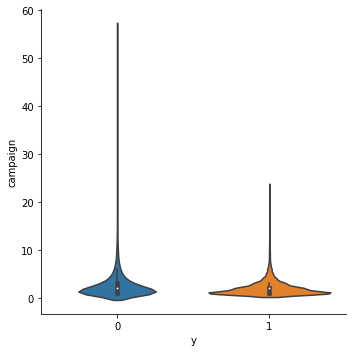

In [61]:
sns.catplot(x ="y", y ="campaign",  data = data, kind = "violin", bw = 0.25);

**PDAYS - VARIABLE A ELIMINAR POR LA CANTIDAD DE VALORES DESCNOCIDOS**

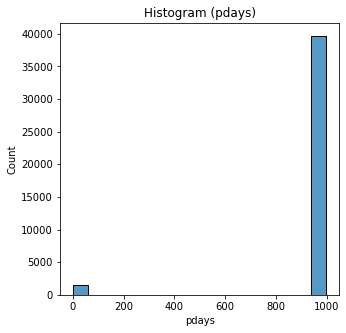

In [108]:
plt.figure(figsize = (5,5))
sns.histplot(x = "pdays", data = data)
plt.title("Histogram (pdays)")
plt.show()

**Previous-Número de contactos para el ofrecimiento antes de la actual campaña**


In [109]:
data['previous'].describe()

count    41176.000000
mean         0.173013
std          0.494964
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

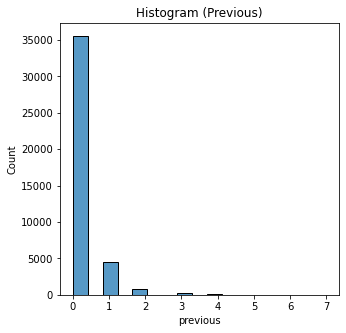

In [110]:
plt.figure(figsize = (5,5))
sns.histplot(x = "previous", data = data)
plt.title("Histogram (Previous)")
plt.show()


In [111]:
data['previous'].value_counts()

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [112]:
d1=data[['previous', 'y']].groupby(['previous'], as_index=False).mean().sort_values(by='y', ascending=False)
d1

,previous,y
5,5,0.722222
6,6,0.600000
3,3,0.592593
4,4,0.542857
2,2,0.464191
1,1,0.212015
0,0,0.088324
7,7,0.000000


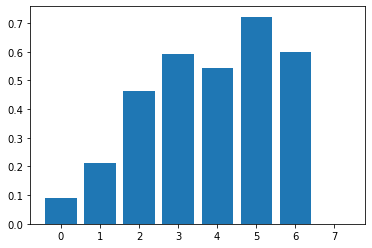

In [113]:
fig, ax = plt.subplots()
ax.bar(d1['previous'], d1['y'])
plt.show()


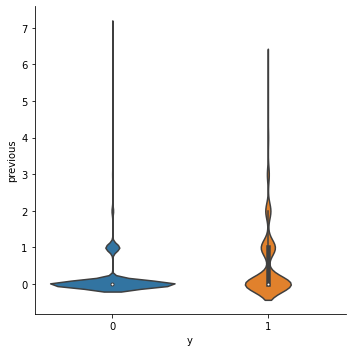

In [114]:
sns.catplot(x = 'y', y ='previous' , data = data, kind = "violin", bw = 0.25);

**INDICADORES : 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx','euribor3m'**


### emp.var.rate 

In [115]:
 data['emp.var.rate'].value_counts()

 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [116]:
d1=data[['emp.var.rate', 'y']].groupby(['emp.var.rate'], as_index=False).mean().sort_values(by='y', ascending=False)
d1

,emp.var.rate,y
4,-1.7,0.521345
1,-3.0,0.511628
5,-1.1,0.474016
0,-3.4,0.424299
2,-2.9,0.356799
3,-1.8,0.159116
6,-0.2,0.100000
7,-0.1,0.063009
9,1.4,0.053365
8,1.1,0.030920


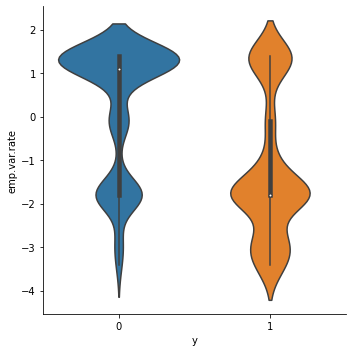

In [117]:
sns.catplot(x = 'y', y ='emp.var.rate' , data = data, kind = "violin", bw = 0.25);

### cons.price.idx 

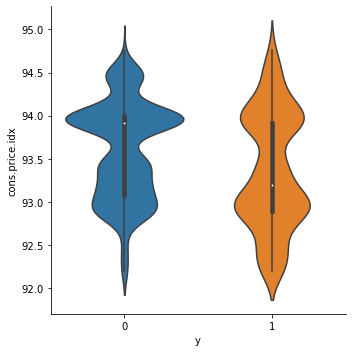

In [120]:
sns.catplot(x = 'y', y ='cons.price.idx' , data = data, kind = "violin", bw = 0.25);

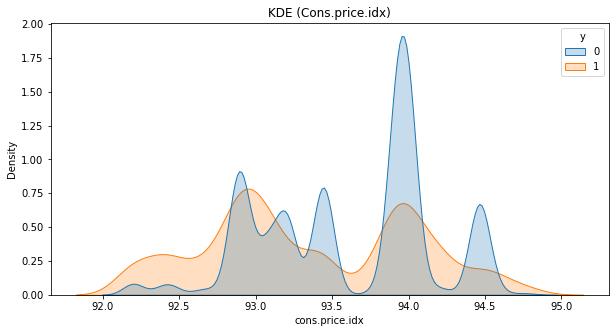

In [122]:
plt.figure(figsize = (10,5))
sns.kdeplot(x = "cons.price.idx", data = data,hue = 'y', fill = True, common_norm = False)
plt.title("KDE (Cons.price.idx)")
plt.show()

## cons.conf.idx 

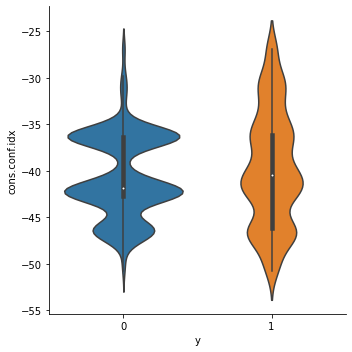

In [79]:
sns.catplot(x = 'y', y ='cons.conf.idx' , data = data, kind = "violin", bw = 0.25);

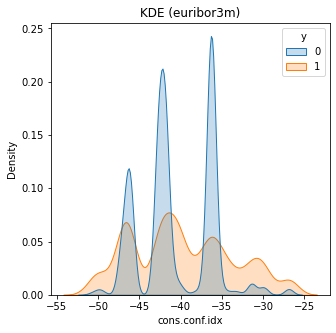

In [124]:
plt.figure(figsize = (5,5))
sns.kdeplot(x = "cons.conf.idx", data = data,hue = 'y', fill = True, common_norm = False)
plt.title("KDE (euribor3m)")
plt.show()

## euribor3m 

In [125]:
data['euribor3m'].describe()

count    41176.000000
mean         3.621293
std          1.734437
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

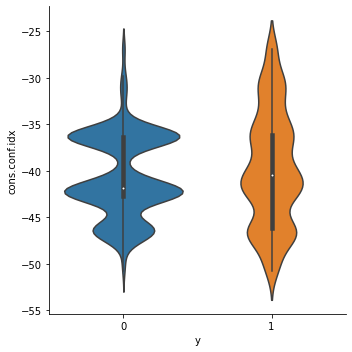

In [126]:
sns.catplot(x = 'y', y ='cons.conf.idx' , data = data, kind = "violin", bw = 0.25);

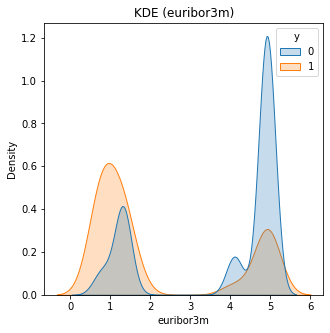

In [128]:
plt.figure(figsize = (5,5))
sns.kdeplot(x = "euribor3m", data = data,hue = 'y', fill = True, common_norm = False)
plt.title("KDE (euribor3m)")
plt.show()

### nr.employed 

In [129]:
d1=data[['nr.employed', 'y']].groupby(['nr.employed'], as_index=False).mean().sort_values(by='y', ascending=False)
d1

,nr.employed,y
2,5008.7,0.567692
1,4991.6,0.521345
4,5023.5,0.511628
0,4963.6,0.474016
3,5017.5,0.424299
5,5076.2,0.356799
6,5099.1,0.127989
7,5176.3,0.100000
9,5195.8,0.063009
10,5228.1,0.053365


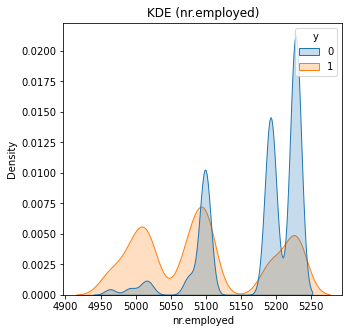

In [130]:
plt.figure(figsize = (5,5))
sns.kdeplot(x = "nr.employed", data = data,hue = 'y', fill = True, common_norm = False)
plt.title("KDE (nr.employed)")
plt.show()

### Transformación de datos

In [131]:
data = data.drop ('pdays', axis =1) #  Eliminación de la variable PDAYS

In [132]:
data.loc[(data['job'] == 'unknown'), 'job'] = "admin." # reemplazo los valores unkown por admin

In [134]:
def job_values(x):
    if x == 'blue-collar':
        resultado = 1
    elif x == 'services':
        resultado = 2
    elif x == 'entrepreneur':
        resultado = 3
    elif x == 'housemaid':
        resultado = 4
    elif x == 'self-employed':
        resultado = 5
    elif x == 'technician':
        resultado = 6
    elif x == 'management':
        resultado = 7
    elif x == 'admin':
        resultado = 8
    elif x == 'unemployed':
        resultado = 9
    elif x == 'student':
        resultado = 10
    else:
        resultado = -1  
    return resultado


data['job_number'] = data['job'].apply(job_values)

In [135]:
data = data.drop ('job', axis =1)

In [136]:
data= pd.get_dummies(data, columns = ['marital'], drop_first=True)


NameError: name 'data3' is not defined

In [137]:
def education_values(x):
    if x == 'unknown':
        resultado = 0
    elif x == 'illiterate':
        resultado = 1
    elif x == 'basic.4y':
        resultado = 2
    elif x == 'basic.6y':
        resultado = 3
    elif x == 'basic.9y':
        resultado = 4
    elif x == 'high.school':
        resultado = 5
    elif x == 'professional.course':
        resultado = 6
    elif x == 'university.degree':
        resultado = 7
    else:
        resultado = -1  
    return resultado

data['education_number'] = data['education'].apply(education_values)

In [138]:
data = data.drop ('education', axis =1)

In [139]:
data = data.drop ('default', axis =1)

In [140]:
# Se reemplaza por no para balancear valores
data.loc[(data['housing'] == 'unknown'), 'housing'] = "no"

In [141]:
data= pd.get_dummies(data, columns = ['housing'], drop_first=True)

In [142]:
data= pd.get_dummies(data, columns = ['loan'], drop_first=True)
data= pd.get_dummies(data, columns = ['contact'], drop_first=True)
data= pd.get_dummies(data, columns = ['month'], drop_first=True)

In [144]:
from time import strptime

def day_number(x):
    return (strptime(x,'%a').tm_wday)+1
data['day_number'] = data['day_of_week'].apply(day_number)
data['day_number']

0        1
1        1
2        1
3        1
4        1
        ..
41183    5
41184    5
41185    5
41186    5
41187    5
Name: day_number, Length: 41176, dtype: int64

In [145]:
data.loc[(data['poutcome'] == 'nonexistent'), 'poutcome'] = 1
data.loc[(data['poutcome'] == 'failure'), 'poutcome'] = 2
data.loc[(data['poutcome'] == 'success'), 'poutcome'] = 10

In [146]:
data['poutcome'].value_counts()

1     35551
2      4252
10     1373
Name: poutcome, dtype: int64

In [147]:
data = data.drop ('day_of_week', axis =1)
data = data.drop ('poutcome', axis =1)

In [150]:
# Transformar todas las variables a numéricas
columns = data.columns
for i in columns:
    data[i] = data[i].astype(int)

## Correlaciones

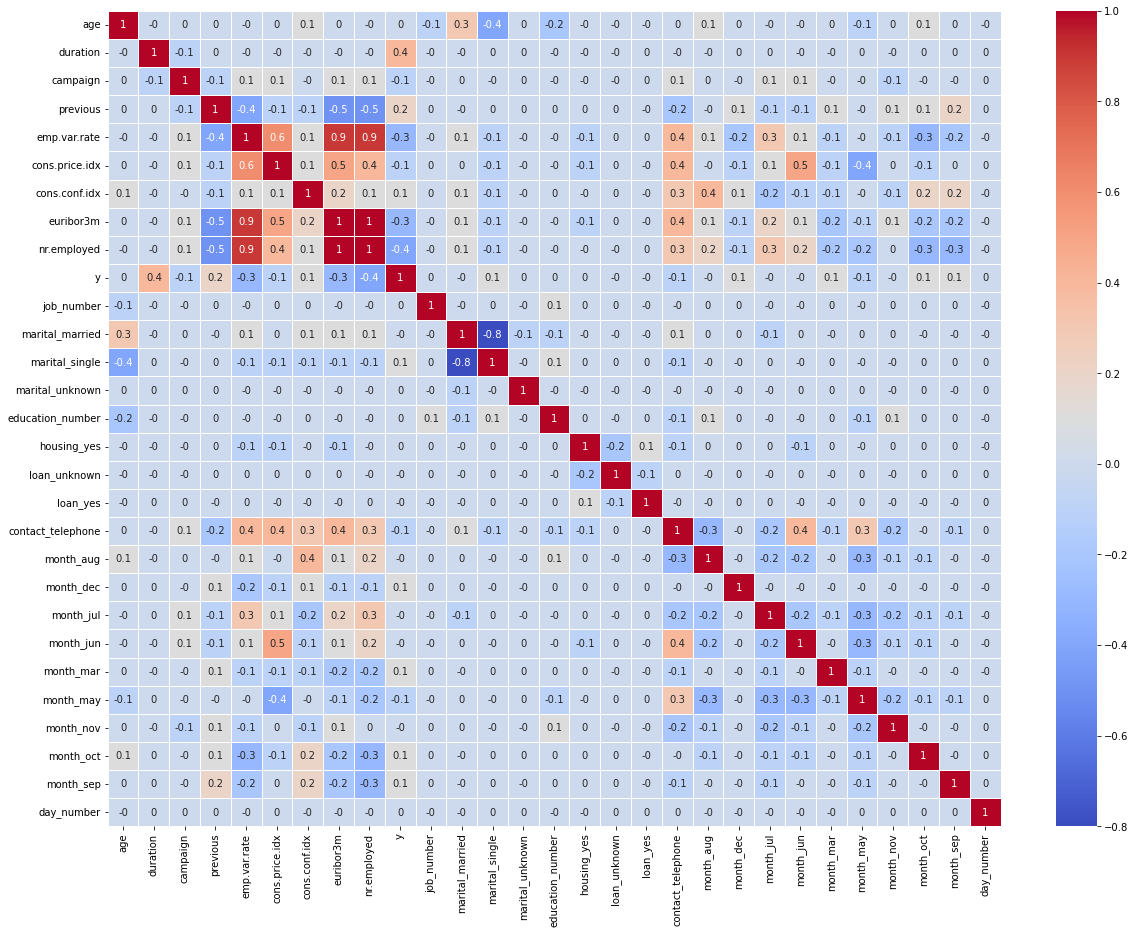

In [152]:
plt.figure(figsize=(20,15))
sns.heatmap(round(data.corr(),1), cmap="coolwarm", annot=True, linewidths=.5)
plt.show()

## DecisionTreeClassifier

In [153]:
#Seperamos en X e y
X = data.drop(["y"], axis=1)
y = data["y"]

In [154]:
#Separamos en train y test!
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.20,
                                    random_state=42)

In [175]:
#Creamos un arbol de decisión sencillo y lo fiteamos
model = DecisionTreeClassifier(max_depth=3, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [176]:
y_train_pred = model.predict(X_train) #Prediccion en Train
y_test_pred = model.predict(X_test) #Prediccion en Test

### Matriz de confusión

|                        |Modelo Negativos (0)| Modelo Positivos (1) |
|------------------------|--------------------|----------------------|
| Valor Real Negativo (0)|Verdaderos negativos| Falso positivo       |
| Valor Real Positivo (1)| Falso negativo     | Verdadero positivo   |


Text(0.5, 33.0, 'Predicted class')

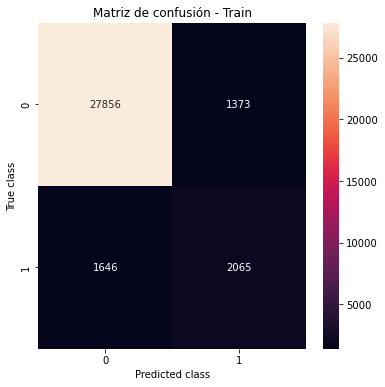

In [177]:

conf_matrix = confusion_matrix(y_train,(y_train_pred).astype(int))
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt="d");
plt.title("Matriz de confusión - Train")
plt.ylabel('True class')
plt.xlabel('Predicted class')

Text(0.5, 33.0, 'Predicted class')

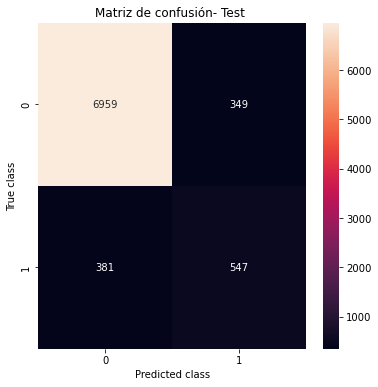

In [178]:
# Test
conf_matrix = confusion_matrix(y_test,(y_test_pred).astype(int))
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt="d");
plt.title("Matriz de confusión- Test ")
plt.ylabel('True class')
plt.xlabel('Predicted class')

In [179]:
#Calculo metricas Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train , y_train_pred)
train_recall = recall_score(y_train , y_train_pred)
train_f1 = f1_score(y_train , y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test , y_test_pred)
test_recall = recall_score(y_test , y_test_pred)
test_f1 = f1_score(y_test , y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de precision sobre el set de entrenamiento:', train_precision)
print('% de recall sobre el set de entrenamiento:', train_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de entrenamiento:', train_f1)
print('')
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print('% de precision sobre el set de evaluación:', test_precision)#porcentaje de valores que se han clasificado como positivos son realmente positivos.
print('% de recall sobre el set de evaluación:', test_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de evaluación:', test_f1)

% de aciertos sobre el set de entrenamiento: 0.9083485124468731
% de precision sobre el set de entrenamiento: 0.6006399069226295
% de recall sobre el set de entrenamiento: 0.5564537860414982
% de f1 sobre el set de entrenamiento: 0.5777031752692685

% de aciertos sobre el set de evaluación: 0.9113647401651287
% de precision sobre el set de evaluación: 0.6104910714285714
% de recall sobre el set de evaluación: 0.5894396551724138
% de f1 sobre el set de evaluación: 0.5997807017543859


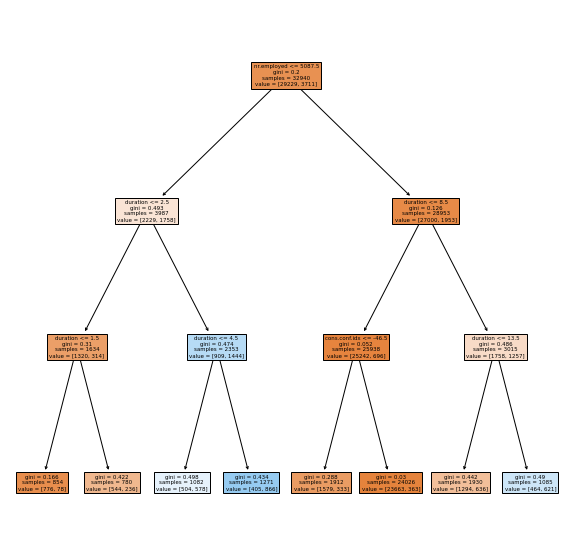

In [185]:
fig = plt.figure(figsize=(10,10))
_=tree.plot_tree(model,feature_names=X.columns,filled=True)

### RandomForest con RandomizedSearchCV

In [195]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_distribs = {'n_estimators': randint (low = 1, high =200),
              'max_depth': randint (low =2, high =4),
              }

random = RandomForestClassifier()
#Utilizamos la grilla definida anteriormente...
model = RandomizedSearchCV(random, param_distributions=param_distribs, cv=2)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A8B9A01940>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A8B9A14400>})

In [196]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor estimador: "+str(model.best_estimator_)+'\n')
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'max_depth': 3, 'n_estimators': 28}
Mejor estimador: RandomForestClassifier(max_depth=3, n_estimators=28)

Mejor Score: 0.890922890103218



In [197]:
model = RandomForestClassifier(max_depth=3, n_estimators=28)
#Utilizamos la grilla definida anteriormente...
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=28)

In [202]:
y_train_pred = model.predict(X_train) #Prediccion en Train
y_test_pred = model.predict(X_test) #Prediccion en Test


Text(0.5, 33.0, 'Predicted class')

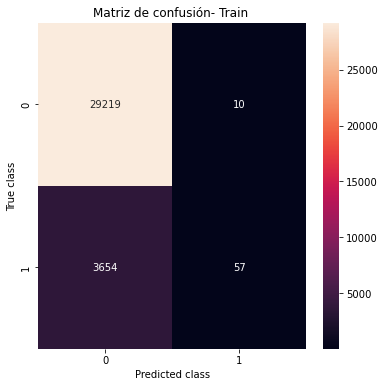

In [199]:
conf_matrix = confusion_matrix(y_train,(y_train_pred).astype(int))
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt="d");
plt.title("Matriz de confusión- Train ")
plt.ylabel('True class')
plt.xlabel('Predicted class')

Text(0.5, 33.0, 'Predicted class')

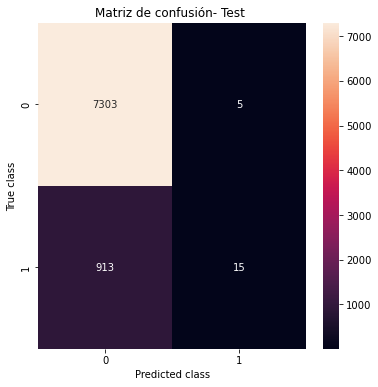

In [200]:
# Test
conf_matrix = confusion_matrix(y_test,(y_test_pred).astype(int))
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt="d");
plt.title("Matriz de confusión- Test ")
plt.ylabel('True class')
plt.xlabel('Predicted class')

In [201]:
#Calculo metricas Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train , y_train_pred)
train_recall = recall_score(y_train , y_train_pred)
train_f1 = f1_score(y_train , y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test , y_test_pred)
test_recall = recall_score(y_test , y_test_pred)
test_f1 = f1_score(y_test , y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de precision sobre el set de entrenamiento:', train_precision)
print('% de recall sobre el set de entrenamiento:', train_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de entrenamiento:', train_f1)
print('')
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print('% de precision sobre el set de evaluación:', test_precision)#porcentaje de valores que se han clasificado como positivos son realmente positivos.
print('% de recall sobre el set de evaluación:', test_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de evaluación:', test_f1)

% de aciertos sobre el set de entrenamiento: 0.8887674559805707
% de precision sobre el set de entrenamiento: 0.8507462686567164
% de recall sobre el set de entrenamiento: 0.015359741309620048
% de f1 sobre el set de entrenamiento: 0.030174695606140816

% de aciertos sobre el set de evaluación: 0.8885381253035454
% de precision sobre el set de evaluación: 0.75
% de recall sobre el set de evaluación: 0.016163793103448277
% de f1 sobre el set de evaluación: 0.03164556962025317


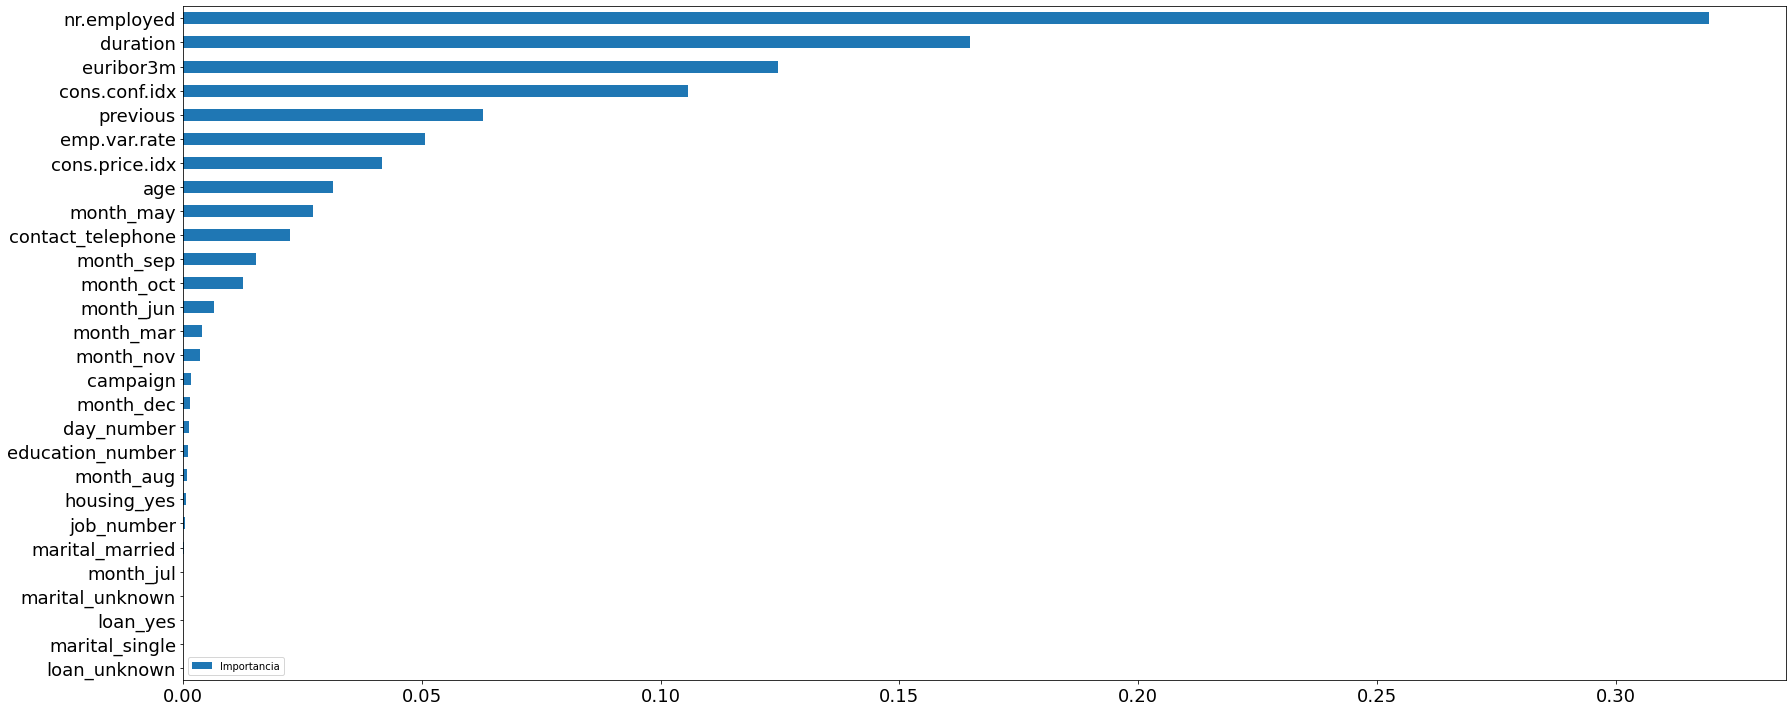

In [203]:
#Para hacer feature selection, luego volver a entrenar con los más importantes
importances = model.feature_importances_
feature = pd.DataFrame(importances.reshape(1,-1), columns = X.columns, index=['Importancia']).T
feature.sort_values(by=['Importancia'],ascending= True, inplace = True)
feature.plot(kind = 'barh', figsize=(25,10), fontsize = 18)
plt.tight_layout()


In [139]:
!pip install xgboost

In [205]:
import xgboost as xgb
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split, cross_val_predict
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


In [206]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

Text(0.5, 34.0, 'Predicted class')

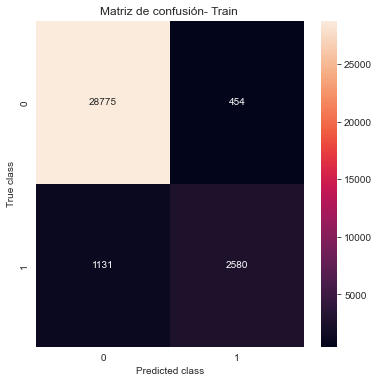

In [207]:
conf_matrix = confusion_matrix(y_train,(y_train_pred).astype(int))
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt="d");
plt.title("Matriz de confusión- Train ")
plt.ylabel('True class')
plt.xlabel('Predicted class')

Text(0.5, 34.0, 'Predicted class')

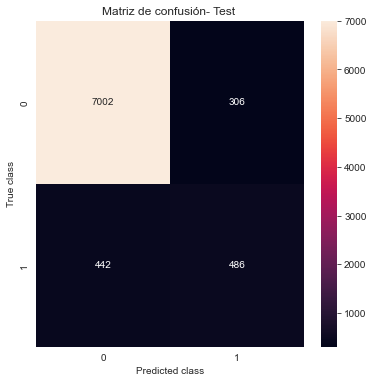

In [208]:
# Test
conf_matrix = confusion_matrix(y_test,(y_test_pred).astype(int))
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt="d");
plt.title("Matriz de confusión- Test ")
plt.ylabel('True class')
plt.xlabel('Predicted class')

In [209]:
#Calculo metricas Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train , y_train_pred)
train_recall = recall_score(y_train , y_train_pred)
train_f1 = f1_score(y_train , y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test , y_test_pred)
test_recall = recall_score(y_test , y_test_pred)
test_f1 = f1_score(y_test , y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de precision sobre el set de entrenamiento:', train_precision)
print('% de recall sobre el set de entrenamiento:', train_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de entrenamiento:', train_f1)
print('')
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print('% de precision sobre el set de evaluación:', test_precision)#porcentaje de valores que se han clasificado como positivos son realmente positivos.
print('% de recall sobre el set de evaluación:', test_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de evaluación:', test_f1)

% de aciertos sobre el set de entrenamiento: 0.9518822100789314
% de precision sobre el set de entrenamiento: 0.8503625576796309
% de recall sobre el set de entrenamiento: 0.6952303961196443
% de f1 sobre el set de entrenamiento: 0.765011119347665

% de aciertos sobre el set de evaluación: 0.9091792132102963
% de precision sobre el set de evaluación: 0.6136363636363636
% de recall sobre el set de evaluación: 0.5237068965517241
% de f1 sobre el set de evaluación: 0.5651162790697675


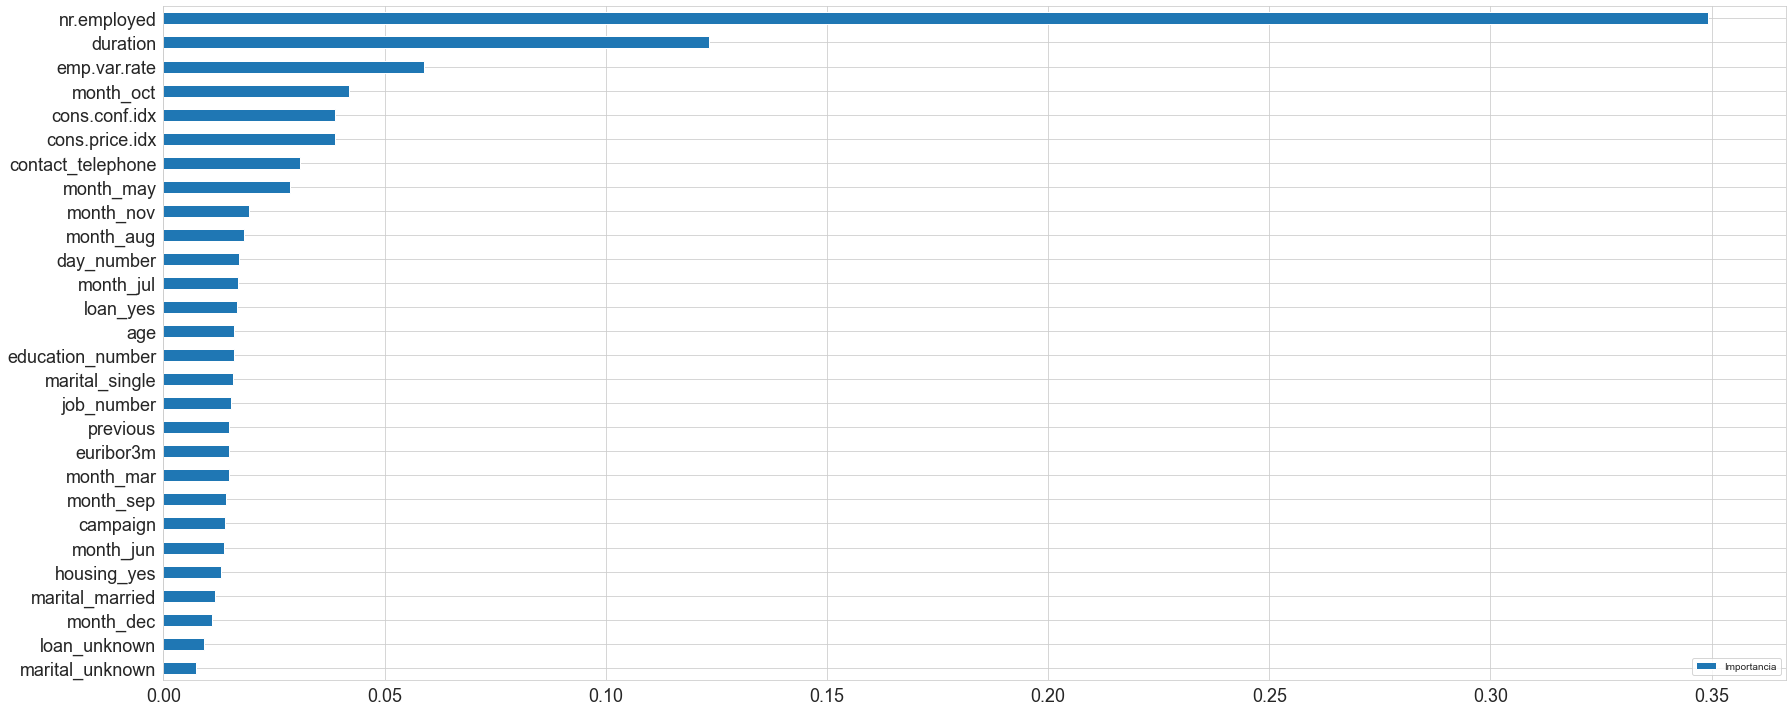

In [210]:
importances = xgb.feature_importances_
feature = pd.DataFrame(importances.reshape(1,-1), columns = X.columns, index=['Importancia']).T
feature.sort_values(by=['Importancia'],ascending= True, inplace = True)
feature.plot(kind = 'barh', figsize=(25,10), fontsize = 18)
plt.tight_layout()

### XGBOOST CON LOS MEJORES HIPERPARÁMETROS

In [211]:
param_grid = [
    { # booster gbtree
    'booster': ['gbtree'],
    'max_depth': [2, 3, 4,5],
        'n_estimators': [100,150,200],
   ## 'sampling_method':['gradient_based','uniform' ],
    'scale_pos_weight': [5,8,11]  # recomendado: sum(y_train==0)/sum(y_train==1) = 7,876 aprox.
    }
]

In [213]:
xgb = XGBClassifier()

In [214]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(xgb, param_grid=param_grid, scoring='precision', cv=5, return_train_score=True)

In [215]:
model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid=[{'booster': ['gbtree'], 'max_depth': [2, 3, 4, 5],
                          'n_estimators': [100, 150, 200],
                          'scale_pos_weight': [5, 8, 11]}],
             return_train_score=True, scoring='precision')

In [216]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor estimador: "+str(model.best_estimator_)+'\n')
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'booster': 'gbtree', 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 5}
Mejor estimador: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Mejor Score: 0.5011658528251333



In [217]:
model = XGBClassifier(booster='gbtree',max_depth=5, scale_pos_weight= 5, n_estimators = 200)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [218]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


Text(0.5, 34.0, 'Predicted class')

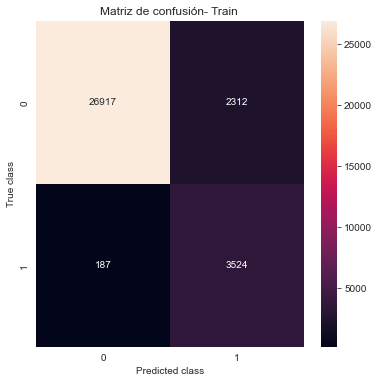

In [219]:
conf_matrix = confusion_matrix(y_train,(y_train_pred).astype(int))
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt="d");
plt.title("Matriz de confusión- Train ")
plt.ylabel('True class')
plt.xlabel('Predicted class')

Text(0.5, 34.0, 'Predicted class')

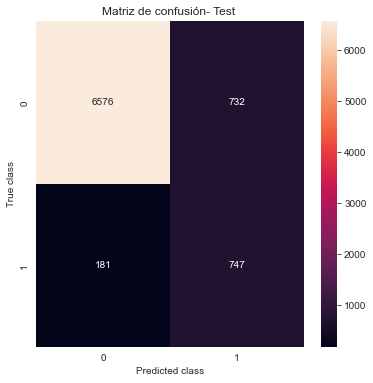

In [220]:
# Test
conf_matrix = confusion_matrix(y_test,(y_test_pred).astype(int))
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt="d");
plt.title("Matriz de confusión- Test ")
plt.ylabel('True class')
plt.xlabel('Predicted class')

In [221]:
#Calculo metricas Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train , y_train_pred)
train_recall = recall_score(y_train , y_train_pred)
train_f1 = f1_score(y_train , y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test , y_test_pred)
test_recall = recall_score(y_test , y_test_pred)
test_f1 = f1_score(y_test , y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de precision sobre el set de entrenamiento:', train_precision)
print('% de recall sobre el set de entrenamiento:', train_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de entrenamiento:', train_f1)
print('')
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print('% de precision sobre el set de evaluación:', test_precision)#porcentaje de valores que se han clasificado como positivos son realmente positivos.
print('% de recall sobre el set de evaluación:', test_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de evaluación:', test_f1)

% de aciertos sobre el set de entrenamiento: 0.9241347905282331
% de precision sobre el set de entrenamiento: 0.6038382453735435
% de recall sobre el set de entrenamiento: 0.9496092697386149
% de f1 sobre el set de entrenamiento: 0.7382423798051743

% de aciertos sobre el set de evaluación: 0.8891452161243322
% de precision sobre el set de evaluación: 0.5050709939148073
% de recall sobre el set de evaluación: 0.8049568965517241
% de f1 sobre el set de evaluación: 0.6206896551724137


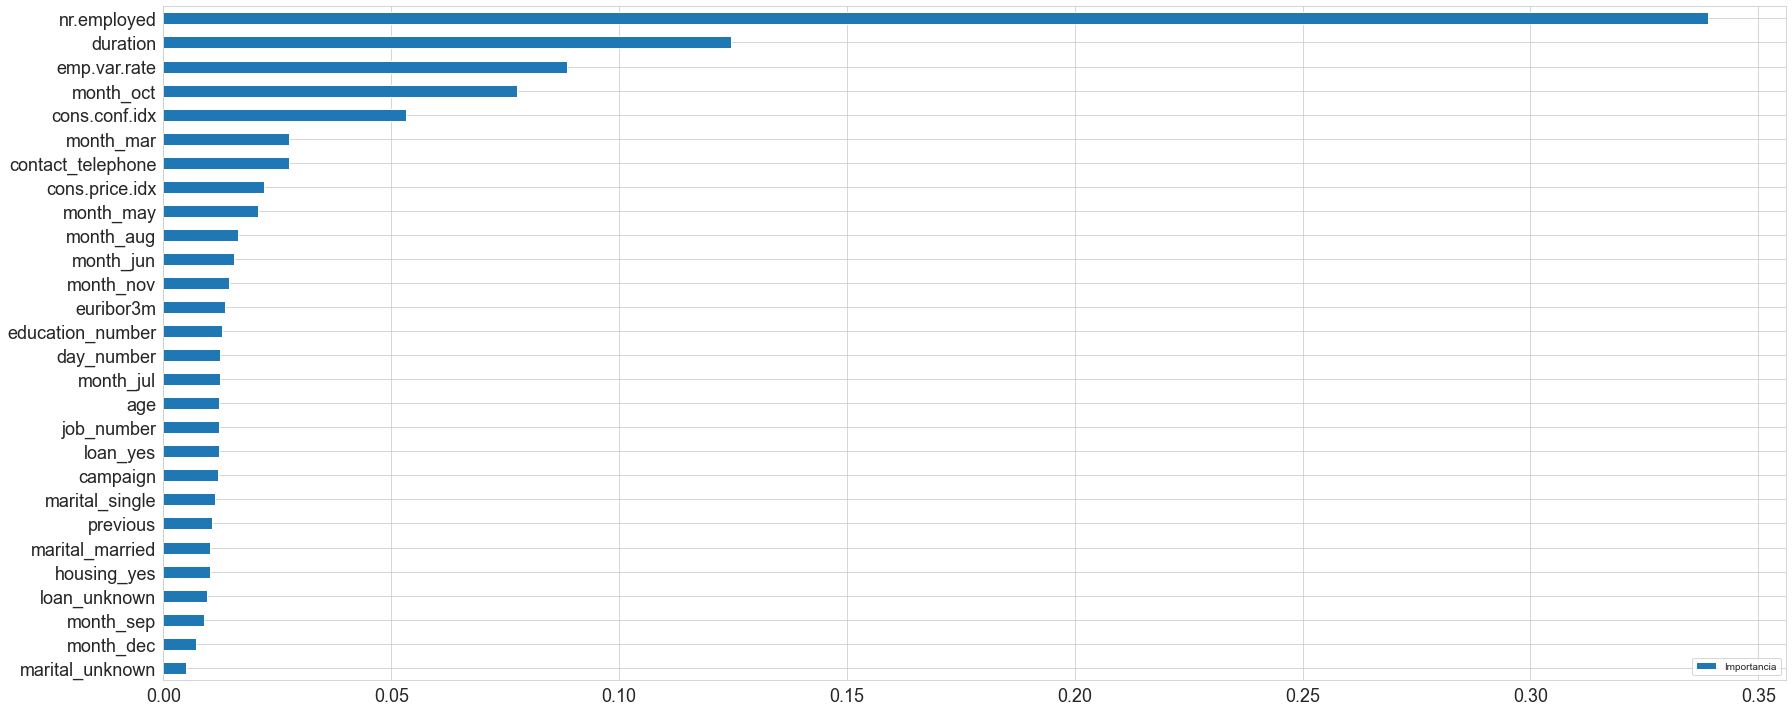

In [222]:
importances = model.feature_importances_
feature = pd.DataFrame(importances.reshape(1,-1), columns = X.columns, index=['Importancia']).T
feature.sort_values(by=['Importancia'],ascending= True, inplace = True)
feature.plot(kind = 'barh', figsize=(25,10), fontsize = 18)
plt.tight_layout()
